<a href="https://colab.research.google.com/github/Rikipratama/Data-analisis/blob/main/Text_mining_%26_Sentimen_Analysis_Mobile_Legends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Install Library

In [2]:
!pip install google-play-scraper
!pip install pandas matplotlib seaborn
!pip install nltk


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.6 MB/s eta 0:00:00


### Import Library

In [3]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


### Scraping Review PlayStore

In [4]:
from google_play_scraper import Sort, reviews

result,_ = reviews(
    'com.mobile.legends',       # ID aplikasi
    lang='id',                  # Bahasa
    country='id',               # Negara
    sort=Sort.NEWEST,           # Urutan                  # Jumlah review
)

# Convert ke DataFrame
import pandas as pd
df = pd.DataFrame(result)


### Import data and View Dataset

In [5]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,8b235961-4407-4ad1-b7f7-3e4840ef437c,Calvin Paul,https://play-lh.googleusercontent.com/a-/ALV-U...,game parah main di kasih dark sistem mulu lebi...,1,0,1.9.93.10904,2025-07-11 07:43:12,None,NaT,1.9.93.10904
1,ed70a53b-61a1-464d-878f-f350eed12a9b,Nifal,https://play-lh.googleusercontent.com/a/ACg8oc...,Game nya bagus sih tapi dapet tim nya ga bnr m...,5,2,1.9.64.10601,2025-07-11 07:43:09,None,NaT,1.9.64.10601
2,501ec107-693e-4402-abd2-19f8d9fe30ee,Devi Novianti,https://play-lh.googleusercontent.com/a/ACg8oc...,benerin dulu sistem lu baru dah keluarin skin ...,1,0,None,2025-07-11 07:42:29,None,NaT,None
3,21e26be4-7171-4b6d-be4b-8f361c70b36c,Anjwy .l,https://play-lh.googleusercontent.com/a/ACg8oc...,game yang seru bangat si game ini,5,0,None,2025-07-11 07:42:12,None,NaT,None
4,e7e13219-a5e5-4bdd-a79a-f18cfdf2c3db,Oktaditya Alfatih,https://play-lh.googleusercontent.com/a/ACg8oc...,"Banyak tim daek sistem di rank, dan harus lebi...",1,0,1.9.93.10904,2025-07-11 07:41:50,None,NaT,1.9.93.10904


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              100 non-null    object        
 1   userName              100 non-null    object        
 2   userImage             100 non-null    object        
 3   content               100 non-null    object        
 4   score                 100 non-null    int64         
 5   thumbsUpCount         100 non-null    int64         
 6   reviewCreatedVersion  76 non-null     object        
 7   at                    100 non-null    datetime64[ns]
 8   replyContent          1 non-null      object        
 9   repliedAt             1 non-null      datetime64[ns]
 10  appVersion            76 non-null     object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 8.7+ KB


In [7]:
print(df[['content', 'score']].head())

                                             content  score
0  game parah main di kasih dark sistem mulu lebi...      1
1  Game nya bagus sih tapi dapet tim nya ga bnr m...      5
2  benerin dulu sistem lu baru dah keluarin skin ...      1
3                  game yang seru bangat si game ini      5
4  Banyak tim daek sistem di rank, dan harus lebi...      1


### Preprocessing & Handling missing value

In [8]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return " ".join(tokens)

df['clean_content'] = df['content'].astype(str).apply(clean_text)
df[['content', 'clean_content', 'score']].head()


,content,clean_content,score
0,game parah main di kasih dark sistem mulu lebi...,game parah main di kasih dark sistem mulu lebi...,1
1,Game nya bagus sih tapi dapet tim nya ga bnr m...,game nya bagus sih tapi dapet tim nya ga bnr mulu,5
2,benerin dulu sistem lu baru dah keluarin skin ...,benerin dulu sistem lu baru dah keluarin skin ...,1
3,game yang seru bangat si game ini,game yang seru bangat si game ini,5
4,"Banyak tim daek sistem di rank, dan harus lebi...",banyak tim daek sistem di rank dan harus lebih...,1


### Label Sentimen

In [9]:
def label_sentiment(score):
    if score >= 4:
        return 'Positif'
    elif score == 3:
        return 'Netral'
    else:
        return 'Negatif'

df['sentiment'] = df['score'].apply(label_sentiment)
df[['clean_content','sentiment']].head()



,clean_content,sentiment
0,game parah main di kasih dark sistem mulu lebi...,Negatif
1,game nya bagus sih tapi dapet tim nya ga bnr mulu,Positif
2,benerin dulu sistem lu baru dah keluarin skin ...,Negatif
3,game yang seru bangat si game ini,Positif
4,banyak tim daek sistem di rank dan harus lebih...,Negatif


### Train Test Split

In [10]:
from sklearn.model_selection import train_test_split

X = df['clean_content']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("Train size:", len(X_train))
print("Test size:", len(X_test))

Train size: 80
Test size: 20


### TF-IDF Vectorization

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("TF-IDF Train shape:", X_train_tfidf.shape)
print("TF-IDF Test shape:", X_test_tfidf.shape)

TF-IDF Train shape: (80, 392)
TF-IDF Test shape: (20, 392)


### Modeling — Naive Bayes & Logistic Regression

In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# Inisialisasi model
nb_model = MultinomialNB()

# Training
nb_model.fit(X_train_tfidf, y_train)

# Prediksi
y_pred_nb = nb_model.predict(X_test_tfidf)

# Evaluasi
print("=== Naive Bayes ===")
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


=== Naive Bayes ===
[[10  0  1]
 [ 1  0  0]
 [ 4  0  4]]
              precision    recall  f1-score   support

     Negatif       0.67      0.91      0.77        11
      Netral       0.00      0.00      0.00         1
     Positif       0.80      0.50      0.62         8

    accuracy                           0.70        20
   macro avg       0.49      0.47      0.46        20
weighted avg       0.69      0.70      0.67        20



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

# Inisialisasi model
lr_model = LogisticRegression(max_iter=1000)

# Training
lr_model.fit(X_train_tfidf, y_train)

# Prediksi
y_pred_lr = lr_model.predict(X_test_tfidf)

# Evaluasi
print("=== Logistic Regression ===")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


=== Logistic Regression ===
[[10  0  1]
 [ 1  0  0]
 [ 4  0  4]]
              precision    recall  f1-score   support

     Negatif       0.67      0.91      0.77        11
      Netral       0.00      0.00      0.00         1
     Positif       0.80      0.50      0.62         8

    accuracy                           0.70        20
   macro avg       0.49      0.47      0.46        20
weighted avg       0.69      0.70      0.67        20



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Visualisasi Confusion Matrix

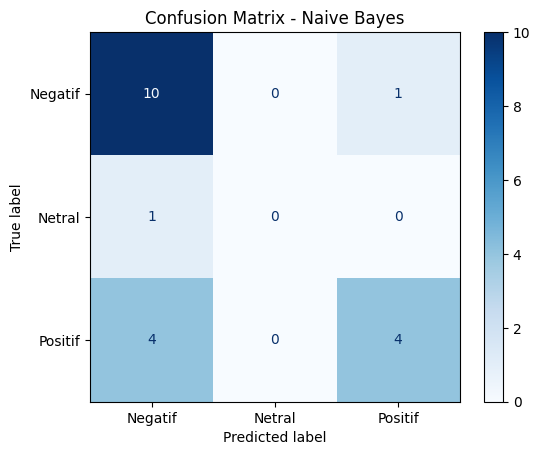

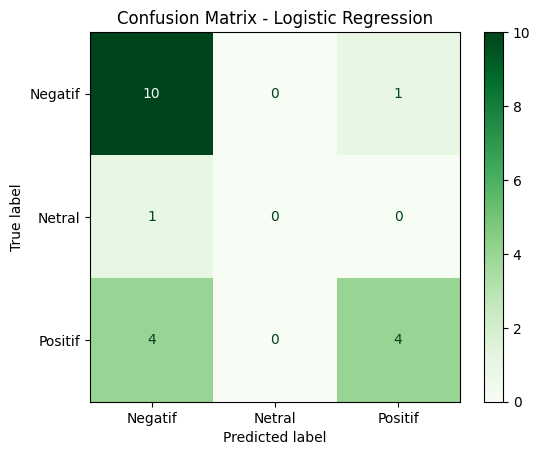

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Buat confusion matrix display untuk Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=nb_model.classes_)

disp_nb.plot(cmap='Blues')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

# Confusion matrix untuk Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=lr_model.classes_)

disp_lr.plot(cmap='Greens')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

/tmp/ipython-input-10-3200868418.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='pastel')


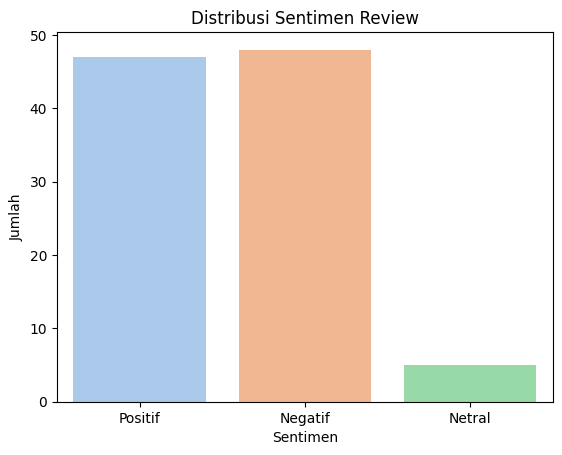

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='sentiment', palette='pastel')
plt.title('Distribusi Sentimen Review')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()


In [11]:
print("Contoh review positif:")
print(df[df['sentiment']=='Positif']['content'].head(3).to_string(index=False))

print("\nContoh review negatif:")
print(df[df['sentiment']=='Negatif']['content'].head(3).to_string(index=False))


Contoh review positif:
bagus game nya cuman gw dikasih timnya yang nge...
terima kasih telah membuat game yang sangat fri...
                                             seruu

Contoh review negatif:
Game apaan ini tiap hari saya ketemu orang yg s...
kecewa saya akun hilang sudah isi proses formul...
game nya sering ngebug, jaringan ga bagus pas l...


### **Insight**
Banyak review negatif membahas lag, sinyal, atau hero imbalance.

Fitur seperti skin atau update terbaru bisa memicu sentimen negatif atau positif.

Matchmaking jadi faktor sering disebut di review 1–2 bintang.

### Wordcloud

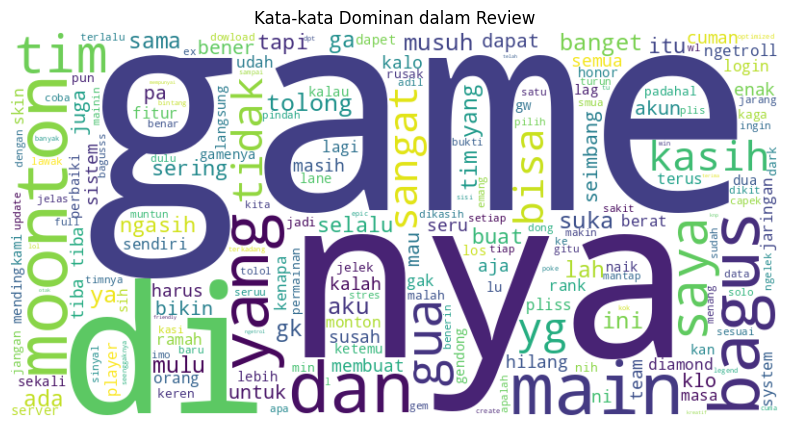

In [12]:
from wordcloud import WordCloud

text = " ".join(df['clean_content'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Kata-kata Dominan dalam Review")
plt.show()
